## Facial Emotion Detection

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras import backend as K

from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelBinarizer

import matplotlib.pyplot as plt

import numpy as np

Using TensorFlow backend.


In [2]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory = r'../classifiedData/training',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

Found 8216 images belonging to 8 classes.


In [3]:
val_datagen = ImageDataGenerator(
        rescale=1./255)
val_generator = val_datagen.flow_from_directory(
        directory = r'../classifiedData/validation',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_labels = []

for i in range(0,2737//32+1):
    val_labels.extend(np.array(val_generator[i][1]))

Found 2737 images belonging to 8 classes.


In [4]:
test_datagen = ImageDataGenerator(
        rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        directory = r'../classifiedData/testing',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

test_labels = []

for i in range(0,2736//32+1):
    test_labels.extend(np.array(test_generator[i][1]))

Found 2736 images belonging to 8 classes.


In [5]:
img_width = 224
img_height = 224
epochs = 2

In [6]:
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

model_t = Sequential()
model_t.add(Conv2D(32, (3, 3), input_shape=input_shape))
model_t.add(Activation('relu'))
model_t.add(MaxPooling2D(pool_size=(2, 2)))

model_t.add(Conv2D(32, (3, 3)))
model_t.add(Activation('relu'))
model_t.add(MaxPooling2D(pool_size=(2, 2)))

model_t.add(Conv2D(64, (3, 3)))
model_t.add(Activation('relu'))
model_t.add(MaxPooling2D(pool_size=(2, 2)))

model_t.add(Flatten())
model_t.add(Dense(64))
model_t.add(Activation('relu'))
model_t.add(Dropout(0.5))
model_t.add(Dense(8))
model_t.add(Activation('softmax'))

model_t.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

H_t = model_t.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=8216//32,
    validation_steps=2737//32,
    validation_data=val_generator
    )

Epoch 1/2
256/256 [==============================] - 194s 759ms/step - loss: 1.1200 - acc: 0.5344 - val_loss: 0.8085 - val_acc: 0.7151
Epoch 2/2
256/256 [==============================] - 183s 715ms/step - loss: 0.8401 - acc: 0.7091 - val_loss: 0.6806 - val_acc: 0.7682


In [7]:
# make predictions on the validation images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_val = model_t.predict_generator(val_generator,
                                   steps=2737//32 + 1)
predIdxs_val = np.argmax(predIdxs_val, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(val_labels,axis=1), predIdxs_val))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00         2
          2       0.00      0.00      0.00        43
          3       0.00      0.00      0.00         4
          4       0.39      0.37      0.38      1138
          5       0.49      0.60      0.54      1373
          6       0.00      0.00      0.00        54
          7       0.00      0.00      0.00        73

avg / total       0.41      0.45      0.43      2737



/Users/shijizhao/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [8]:
# make predictions on the testing images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_test = model_t.predict_generator(test_generator,
                                   steps=2736//32 + 1)
predIdxs_test = np.argmax(predIdxs_test, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(test_labels,axis=1), predIdxs_test))

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        50
          1       0.00      0.00      0.00         1
          2       0.00      0.00      0.00        43
          3       0.00      0.00      0.00         4
          4       0.42      0.39      0.41      1138
          5       0.50      0.60      0.54      1373
          6       0.00      0.00      0.00        54
          7       0.00      0.00      0.00        73

avg / total       0.42      0.47      0.44      2736



/Users/shijizhao/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


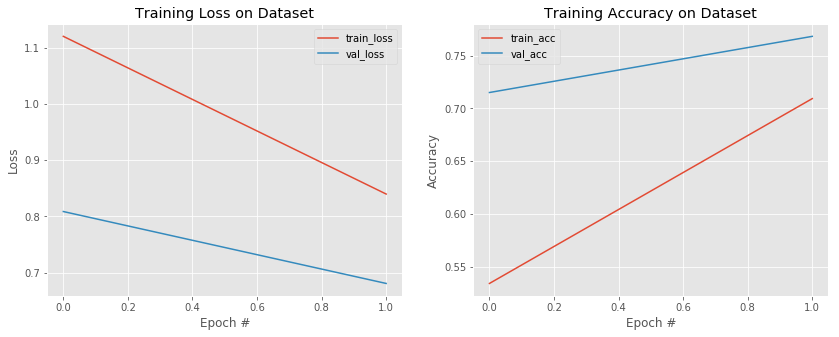

In [9]:
# plot the training loss and accuracy
N = epochs
plt.style.use("ggplot")
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
plt.plot(np.arange(0, N), H_t.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H_t.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0, N), H_t.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H_t.history["val_acc"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [10]:
model_1 = VGG16(include_top=True, classes=8, weights = None)

model_1.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

H_1 = model_1.fit_generator(
    train_generator,
    epochs=epochs,
    steps_per_epoch=8216//32,
    validation_steps=2737//32,
    validation_data=val_generator
    )

Epoch 1/2


KeyboardInterrupt: 